# Decision Tree Classifier

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can per‐
form both classification and regression tasks, and even multioutput tasks

## Important Parameters

1. criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
  * The function to measure the quality of a split.

2. splitter{“best”, “random”}, default=”best”
  * The strategy used to choose the split at each node.


3. max_depth int, default=None
  * The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

4. min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

  * If int, then consider min_samples_split as the minimum number.

  * If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# import basic libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

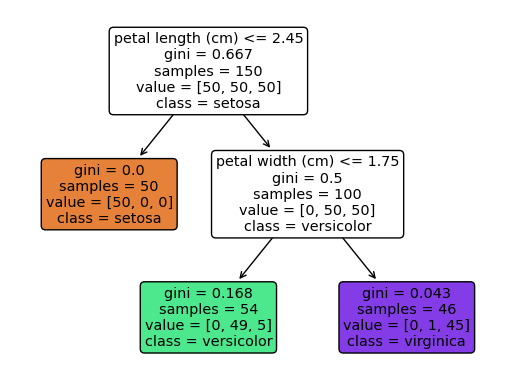

In [9]:
from sklearn.tree import plot_tree
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True
)

Gini range from 0(pure) to 0.5 impure

# Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a partic‐
ular class k

For example, suppose
you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output
the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54),
and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it should out‐
put Iris versicolor (class 1) because it has the highest probability

In [16]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([1])

In [18]:
tree_clf.predict_proba([[1, 1.5]])

array([[1., 0., 0.]])

In [19]:
tree_clf.predict_proba([[5, 1.8]])

array([[0.        , 0.02173913, 0.97826087]])

# Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to lin‐
ear models, which assume that the data is linear, for example). If left unconstrained,
the tree structure will adapt itself to the training data, fitting it very closely—indeed,
most likely overfitting it. Such a model is often called a nonparametric model, not
because it does not have any parameters (it often has a lot) but because the number of
parameters is not determined prior to training, so the model structure is free to stick
closely to the data. In contrast, a parametric model, such as a linear model, has a pre‐
determined number of parameters, so its degree of freedom is limited, reducing the
risk of overfitting (but increasing the risk of underfitting)

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter 

# Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

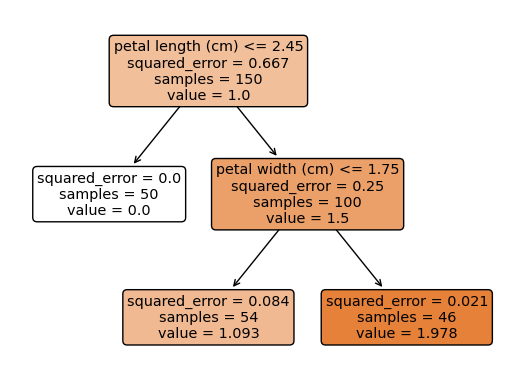

In [21]:
plot_tree(tree_reg,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True
)